# Setup

## Colab

In [1]:
# Mount the drive and move to dir
from google.colab import drive
drive.mount("/content/drive", force_remount = False)
%cd /content/drive/MyDrive/Coding/spread-res/runscr/

Mounted at /content/drive
/content/drive/MyDrive/Coding/spread-res/runscr


## Imports

In [2]:
# Import importlib to reload modules and sys and os to add the path for other import
import importlib
import os
import sys

import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the model architecture
from classes.models import BertGridNew

# Import the utilities and the dataloader
from utils import inferutil, setuputil, trainutil

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertGridNew)

# Import the model and funcs required from utils
from classes.models.BertGridNew import BertGridNew
from utils.inferutil import infer_full, infer_one
from utils.setuputil import display_config, setup_config
from utils.trainutil import train_model

## Configuration

device = cuda/mps:0 (env-specific), threads = 1 to inf (env-specific), seed = 0 to inf, data_dir = ../data, rows = 100, cols = 100, tokens = 32, save_dir = ../models/

In [3]:
# Setup the config
input_config = {
    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertGridNew",
    "model_base": "bert-base-cased",
    "data_ds": "1k",
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 32,
    "num_hidden_layers": 1,
    "num_attention_heads": 1,
    "intermediate_size": 128,
    # Training Parameters
    "batch_size": 12,
    "lr": 1e-3,
    "mu": 0.25,
    "epochs": 200,
    "patience": 2,
    "save_int": 50,
}
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Processing files: 100%|██████████| 800/800 [02:55<00:00,  4.55it/s]



800(P) = 800(G) + 0(E)


Processing files: 100%|██████████| 100/100 [00:25<00:00,  3.89it/s]



100(P) = 100(G) + 0(E)


Processing files: 100%|██████████| 100/100 [00:26<00:00,  3.75it/s]



100(P) = 100(G) + 0(E)

FINAL CONFIG:
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "bert-base-cased",
  "model_name": "BertGridNew",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "1k",
  "data_dir": "../data",
  "train_dir": "../data/1k_train",
  "val_dir": "../data/1k_val",
  "test_dir": "../data/1k_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 32,
  "num_hidden_layers": 1,
  "num_attention_heads": 1,
  "intermediate_size": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 12,
  "lr": 0.001,
  "mu": 0.25,
  "epochs": 200,
  "patience": 2,
  

# Model Training

In [4]:
# Create and observe the model
untrained_model = BertGridNew(config).to(DEVICE)
print(untrained_model)

BertGridNew(
  (bertModel_cell): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 32, padding_idx=0)
      (position_embeddings): Embedding(64, 32)
      (token_type_embeddings): Embedding(2, 32)
      (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=32, out_features=32, bias=True)
              (key): Linear(in_features=32, out_features=32, bias=True)
              (value): Linear(in_features=32, out_features=32, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=32, out_features=32, bias=True)
              (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)


## Training Metrics

1. GPU Model: 521 mb
2. GPU Training: 31.2 gb

3. Per Epoch Train Time: 33s
4. Per Epoch Val Time: 1s


In [5]:
# Train with adjusted batch size
trained_model = train_model(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.44it/s]


Train Loss: 1.1602e+00, Val Loss: 9.5829e-01


Epoch 1


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.50it/s]


Train Loss: 8.5262e-01, Val Loss: 6.7244e-01


Epoch 2


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.47it/s]


Train Loss: 6.4065e-01, Val Loss: 5.5042e-01


Epoch 3


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.50it/s]


Train Loss: 5.3858e-01, Val Loss: 5.0188e-01


Epoch 4


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.49it/s]


Train Loss: 4.8915e-01, Val Loss: 4.7637e-01


Epoch 5


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.51it/s]


Train Loss: 4.6559e-01, Val Loss: 4.5927e-01


Epoch 6


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.40it/s]


Train Loss: 4.4757e-01, Val Loss: 4.4802e-01


Epoch 7


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.50it/s]


Train Loss: 4.3474e-01, Val Loss: 4.3861e-01


Epoch 8


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.46it/s]


Train Loss: 4.2857e-01, Val Loss: 4.3181e-01


Epoch 9


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.46it/s]


Train Loss: 4.1558e-01, Val Loss: 4.2595e-01


Epoch 10


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.39it/s]


Train Loss: 4.1425e-01, Val Loss: 4.2080e-01


Epoch 11


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.49it/s]


Train Loss: 4.2541e-01, Val Loss: 4.1709e-01


Epoch 12


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.48it/s]


Train Loss: 4.1134e-01, Val Loss: 4.1447e-01


Epoch 13


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.51it/s]


Train Loss: 4.1573e-01, Val Loss: 4.1191e-01


Epoch 14


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.48it/s]


Train Loss: 4.1327e-01, Val Loss: 4.0854e-01


Epoch 15


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.47it/s]


Train Loss: 4.0329e-01, Val Loss: 4.0652e-01


Epoch 16


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.47it/s]


Train Loss: 4.1644e-01, Val Loss: 4.0403e-01


Epoch 17


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.47it/s]


Train Loss: 4.1094e-01, Val Loss: 4.0277e-01


Epoch 18


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.44it/s]


Train Loss: 4.1948e-01, Val Loss: 4.0227e-01


Epoch 19


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.47it/s]


Train Loss: 4.1462e-01, Val Loss: 4.0045e-01


Epoch 20


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.46it/s]


Train Loss: 4.2944e-01, Val Loss: 3.9967e-01


Epoch 21


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.44it/s]


Train Loss: 4.2811e-01, Val Loss: 3.9918e-01


Epoch 22


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.50it/s]


Train Loss: 4.2909e-01, Val Loss: 3.9826e-01


Epoch 23


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.49it/s]


Train Loss: 4.2833e-01, Val Loss: 3.9765e-01


Epoch 24


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]


Train Loss: 4.2784e-01, Val Loss: 3.9537e-01


Epoch 25


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.43it/s]


Train Loss: 4.2801e-01, Val Loss: 3.9372e-01


Epoch 26


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.49it/s]


Train Loss: 4.2939e-01, Val Loss: 3.9480e-01


Epoch 27


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.52it/s]

Train Loss: 4.4009e-01, Val Loss: 3.9477e-01


EARLY STOPPING at epoch 27, best epoch 25
Train Loss = 4.2801e-01, Val Loss = 3.9372e-01


TRAINING DONE at epoch 27, best epoch 25
Train Loss = 0.42801244934993005, Perplexity = 1.0000035667767722
Val Loss = 0.39371978160407806, Perplexity = 1.0000032810035626


# Evaluation

In [13]:
# Params
loc = 0
thresh = 0.93
infer_batch_size = batch_size

## Single Example


Filename: ../data/1k_train/2006fair.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(63,0): 0.906194 | (45,0): 0.920411 | (39,0): 0.921378 | (28,0): 0.928476 | (23,0): 0.930781 | (16,0): 0.933194 | (6,0): 0.937633 | (0,0): 0.939108

NB to B ratio: Predicted = 9984:16 | Actual = 9992:8
Accuracy: 99.84% | Precision: 25.00% | Recall: 50.00% | F1-Score: 0.33



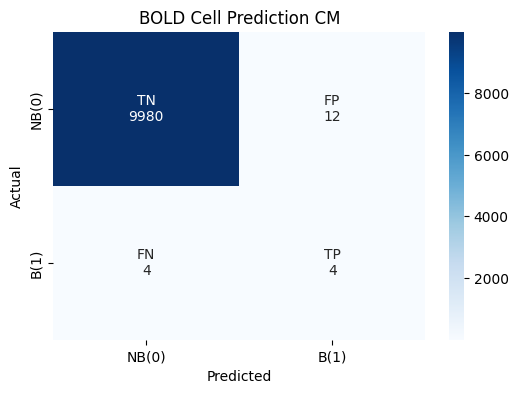


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0
0,1
2,1
3,1
4,1
6,1
8,1
9,1
11,1
12,1
13,1



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0
0,1
6,1
16,1
23,1
28,1
39,1
45,1
63,1


In [14]:
# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=train_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/1k_val/1-s2.0-S0041008X19303655-mmc4.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
No bold cells in the actual data.

NB to B ratio: Predicted = 9772:228 | Actual = 10000:0
Accuracy: 97.72% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



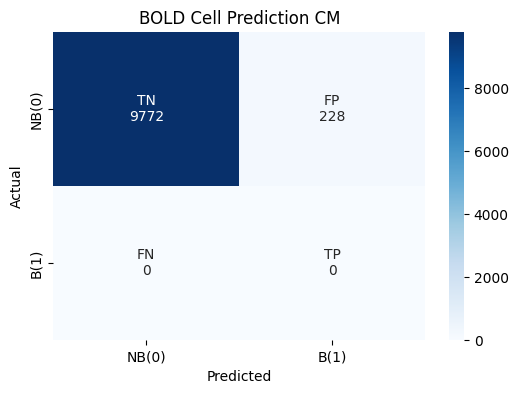


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,0,1,1,1,1,1,0
7,1,1,1,1,1,1,1,0,1,1,1,1,0
8,1,1,1,1,1,1,1,1,1,1,0,1,0
9,1,1,1,1,1,1,1,1,1,1,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---
No bold cells in actual data.


In [15]:
# Inference on single position of val_loader
infer_one(
    trained_model=trained_model,
    infer_loader=val_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/1k_test/1415-bassessment-1.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(8,6): 0.932737 | (8,5): 0.935658 | (8,0): 0.936445 | (6,0): 0.937201 | (8,4): 0.937397 | (8,1): 0.938378 | (8,2): 0.938506 | (8,3): 0.938567

NB to B ratio: Predicted = 9860:140 | Actual = 9992:8
Accuracy: 98.68% | Precision: 5.71% | Recall: 100.00% | F1-Score: 0.11



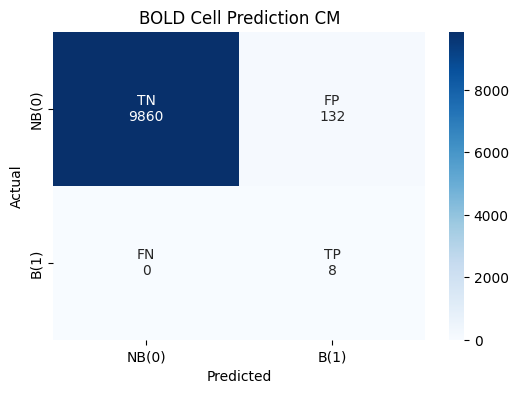


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6
0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0
2,1,1,0,0,0,0,0
3,1,1,0,0,0,0,0
4,1,1,0,0,0,0,0
6,1,0,0,0,0,0,0
8,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1
10,1,1,1,1,1,1,0
11,1,1,1,1,1,1,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6
6,1,0,0,0,0,0,0
8,1,1,1,1,1,1,1


In [16]:
# Inference on single position of test_loader
infer_one(
    trained_model=trained_model,
    infer_loader=test_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)

## All Examples

Batch Inference: 100%|██████████| 67/67 [00:17<00:00,  3.74it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 7916058:83942 | Actual = 7975154:24846
Accuracy: 98.93% | Precision: 13.16% | Recall: 63.76% | F1-Score: 0.19



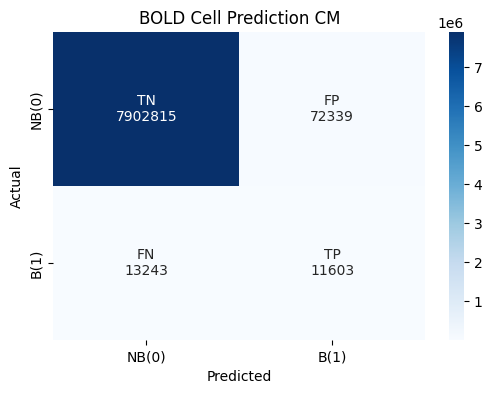

In [17]:
# Infer across all examples of train_loader
infer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 989781:10219 | Actual = 997147:2853
Accuracy: 98.96% | Precision: 15.98% | Recall: 57.54% | F1-Score: 0.23



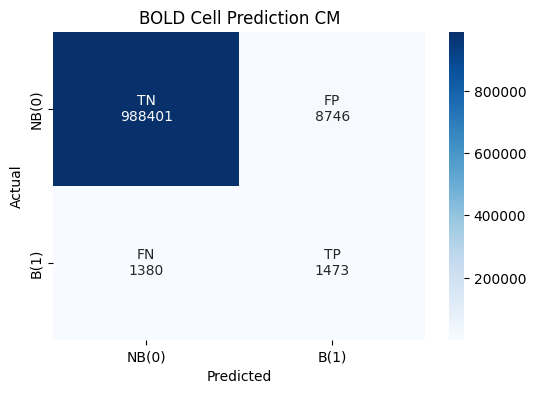

In [18]:
# Infer across all examples of val_loader
infer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 990327:9673 | Actual = 997320:2680
Accuracy: 99.06% | Precision: 16.21% | Recall: 64.15% | F1-Score: 0.25



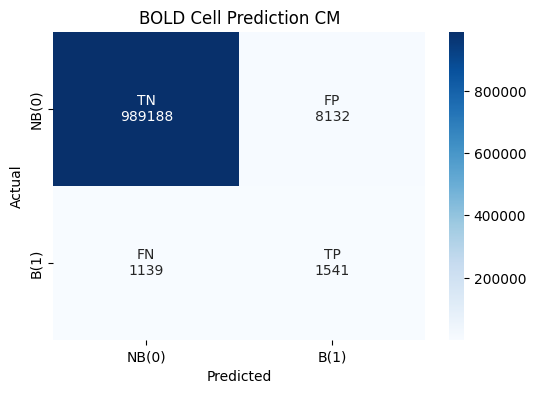

In [19]:
# Infer across all examples of test_loader
infer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)